# Project Movie Industry  Data Analysis
### Dataset Description
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a datasetfocused on movie revenue and analyze it over the last decades
### Questions
* What are the factors that affect the company's revenues, whether by increase or decrease?

In [1]:
# import libraries
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib.inline
#('ggplot') A color package related to the drawing, and it is selected to determine the shape of the resulting drawing
plt.style.use('ggplot') 
from matplotlib.pyplot import figure
matplotlib.rcparams['figure.figsize'] = (12, 8)

UsageError: Line magic function `%matplotlib.inline` not found.


# Data Wrangling

In [2]:
# read in the data
df = pd.read_csv(r'E:\abdo fahmy\Data analysis\Movie Industry prog\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# See the shape of the data
df.shape

(7668, 15)

In [4]:
# Information about the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# check for duplications
df.duplicated().mean()

0.0

In [7]:
# data lost by for loop and (isnull)
for colm in df.columns:
    value_null = np.mean(df[colm].isnull())    
    print(f"{colm} - {value_null} %")

name - 0.0 %
rating - 0.010041731872717789 %
genre - 0.0 %
year - 0.0 %
released - 0.0002608242044861763 %
score - 0.0003912363067292645 %
votes - 0.0003912363067292645 %
director - 0.0 %
writer - 0.0003912363067292645 %
star - 0.00013041210224308815 %
country - 0.0003912363067292645 %
budget - 0.2831246739697444 %
gross - 0.02464788732394366 %
company - 0.002217005738132499 %
runtime - 0.0005216484089723526 %


In [8]:
# knowledge data type
df.dtypes 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Data Cleaning

In [9]:
# Fill in the blank values
df['runtime'] = df['runtime'].fillna(0) 
df['votes'] = df['votes'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [10]:
# transformation data type
df['runtime']= df['runtime'].astype(int)
df['votes']= df['votes'].astype(int)
df['budget']= df['budget'].astype(int)
df['gross']= df['gross'].astype(int)

In [11]:
df.dtypes 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int32
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime       int32
dtype: object

In [12]:
# Delete negative data
df.drop(index=5445, inplace=True)
df.drop(index=7445, inplace=True)
df.drop(index=3045, inplace=True)

In [13]:
# Delete duplicate rows
df.drop_duplicates(inplace= True)

In [14]:
# net profit ranking
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143


In [15]:
pd.set_option('display.max_rows', None)

### General look for numerical data

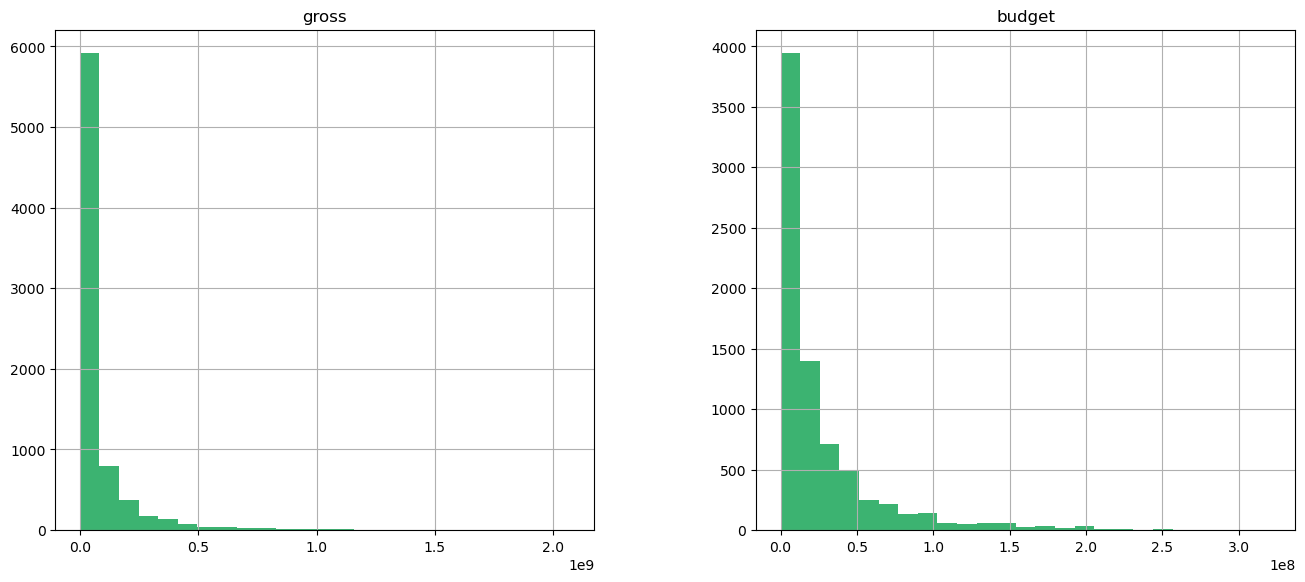

In [16]:
df.hist(column=['gross','budget' ],figsize=(16,6.5),bins=25,color='MediumSeaGreen');

* General look for numerical data gross and budget 
* There is a very close relationship

## Creating Scatter Plots

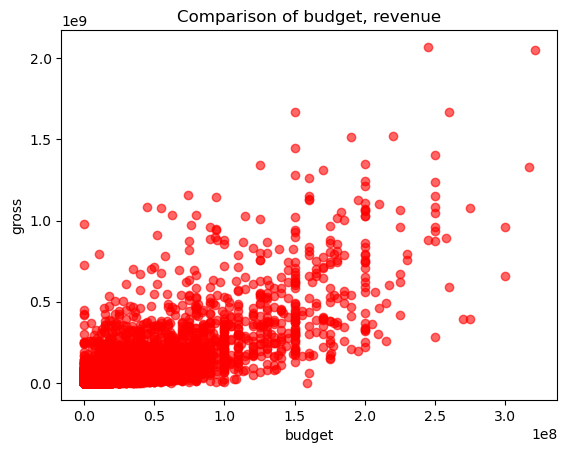

In [17]:
# Comparison between budget and total revenue
# and Creating Scatter Plots
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.6, color='red')
plt.title('Comparison of budget, revenue')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

* There is a coefficient of correlation and relationship
* The higher the budget, the higher the revenue

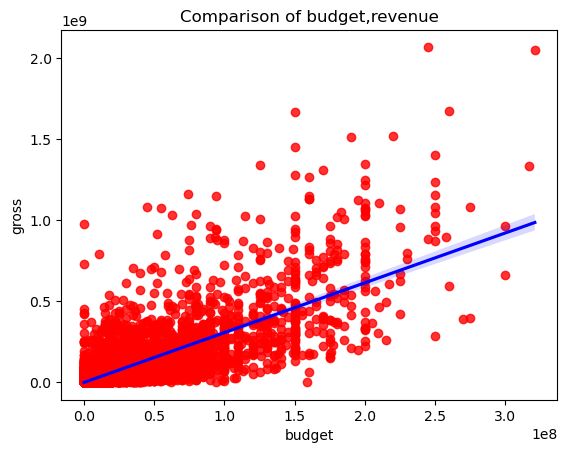

In [18]:
# plot budget vs gross as seaborn
sns.regplot(x=df['budget'], y=df['gross'],scatter_kws={"color":"red"}, line_kws={"color":"blue"},)
plt.title('Comparison of budget,revenue', color='black');

* Here proves the positive correlation

In [19]:
# Consider the strength of the link
corr_matrix = df.corr(method='pearson') #--->>>> pearson, kendall, spearman )
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097531,0.222496,0.309558,0.270321,0.115762
score,0.097531,1.000000,0.408423,0.051897,0.185356,0.397289
votes,0.222496,0.408423,1.000000,0.480335,0.632743,0.301205
budget,0.309558,0.051897,0.480335,1.000000,0.754442,0.262045
gross,0.270321,0.185356,0.632743,0.754442,1.000000,0.233575
runtime,0.115762,0.397289,0.301205,0.262045,0.233575,1.000000


* budget = 0.309212 , gross = 0.256331
* There is a great interest
* He entered with us votes --->>> 0.222427

## heat map

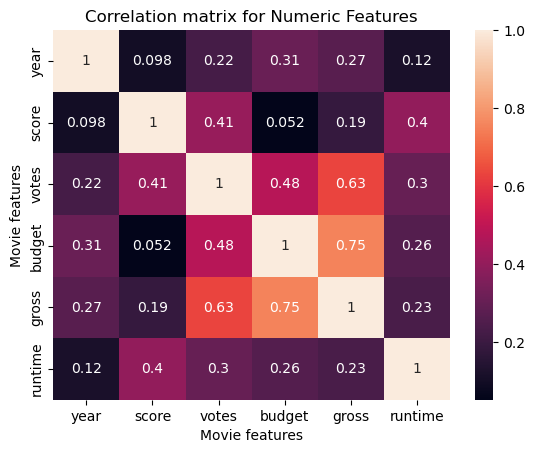

In [20]:
# Photography by correlation budget and gross
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show();

* Here it turned out that there is a strong positive relationship between the budget and the gross
* And the votes affect a large percentage

In [22]:
# transform the object to category
df_numerized = df
for colm_name in df_numerized.columns:
    if(df_numerized[colm_name].dtype == 'object'):
        df_numerized[colm_name] = df_numerized[colm_name].astype('category')
        df_numerized[colm_name] = df_numerized[colm_name].cat.codes                 
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,5142,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,534,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
7480,6192,4,2,2019,1488,6.9,222000,1455,1919,676,55,260000000,1670727580,2316,118
6653,2967,5,0,2015,1704,7.0,593000,517,3568,437,55,150000000,1670516444,2281,124
6043,5500,5,0,2012,2472,8.0,1300000,1517,2314,2241,55,220000000,1518815515,1606,143


In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143


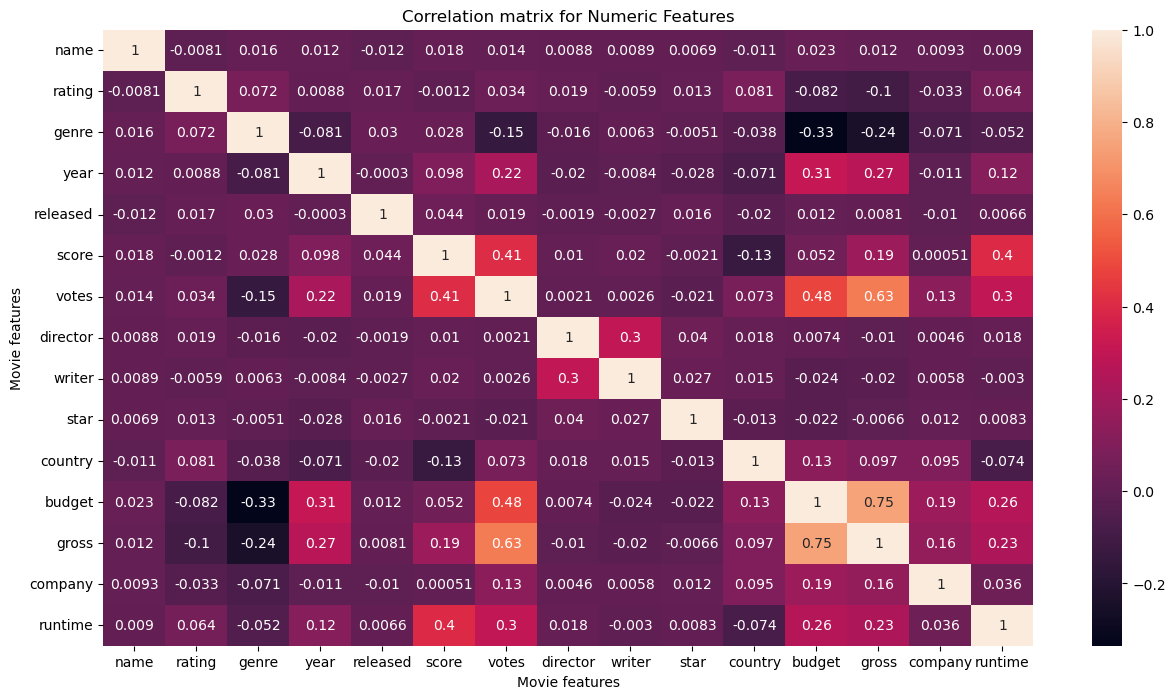

In [23]:
# Heat map after converting all columns to category
plt.figure(figsize=(15,8))
correlation_df = df_numerized.corr(method='pearson')
sns.heatmap(correlation_df, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

* votes affects score
* Votes and budget affect the gross

In [24]:
# Consider the strength of the link
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008097,0.015695,0.011998,-0.011619,0.017532,0.014143,0.008773,0.008856,0.006855,-0.010654,0.022615,0.011607,0.009270,0.008974
rating,-0.008097,1.000000,0.072419,0.008810,0.016569,-0.001245,0.034211,0.019453,-0.005949,0.013441,0.081266,-0.082350,-0.099655,-0.032913,0.064484
genre,0.015695,0.072419,1.000000,-0.080848,0.029515,0.028432,-0.145073,-0.015562,0.006342,-0.005133,-0.037525,-0.334922,-0.241825,-0.070984,-0.052424
year,0.011998,0.008810,-0.080848,1.000000,-0.000302,0.097531,0.222496,-0.020433,-0.008377,-0.027581,-0.071078,0.309558,0.270321,-0.010564,0.115762
released,-0.011619,0.016569,0.029515,-0.000302,1.000000,0.043620,0.018628,-0.001906,-0.002744,0.016169,-0.020231,0.012267,0.008136,-0.010118,0.006649
score,0.017532,-0.001245,0.028432,0.097531,0.043620,1.000000,0.408423,0.010156,0.019900,-0.002150,-0.133713,0.051897,0.185356,0.000514,0.397289
votes,0.014143,0.034211,-0.145073,0.222496,0.018628,0.408423,1.000000,0.002079,0.002551,-0.021071,0.073018,0.480335,0.632743,0.132291,0.301205
director,0.008773,0.019453,-0.015562,-0.020433,-0.001906,0.010156,0.002079,1.000000,0.298868,0.039536,0.017633,0.007360,-0.010348,0.004590,0.018351
writer,0.008856,-0.005949,0.006342,-0.008377,-0.002744,0.019900,0.002551,0.298868,1.000000,0.027481,0.015458,-0.024274,-0.019872,0.005809,-0.003049
star,0.006855,0.013441,-0.005133,-0.027581,0.016169,-0.002150,-0.021071,0.039536,0.027481,1.000000,-0.013138,-0.022238,-0.006581,0.012201,0.008340


In [25]:
corr_mat = df_numerized.corr()
corr_price = corr_mat.unstack()
corr_price.head()

name  name        1.000000
      rating     -0.008097
      genre       0.015695
      year        0.011998
      released   -0.011619
dtype: float64

In [26]:
corr_price.sort_values().head()

budget  genre    -0.334922
genre   budget   -0.334922
        gross    -0.241825
gross   genre    -0.241825
votes   genre    -0.145073
dtype: float64

In [27]:
high_coor = corr_price[(corr_price)> 0.5]
high_coor

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.632743
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.754442
gross     votes       0.632743
          budget      0.754442
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Conclusions
* budget = 0.309212 , gross = 0.256331 There is a great interest
* Here it turned out that there is a strong positive relationship between the budget and the gross
* And the votes affect a large percentage
* votes affects score
* Votes and budget affect the gross


# limitations of
* Other analyzes did not give a clear relationship